## Get Libraries

In [ ]:
pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 32kB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 450kB 37.2MB/s 
     |████████████████████████████████| 3.9MB 36.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=0431e4df437cf47c9ad0d178f928e8f687aaed5961e29240f2295d21ce3e3f80
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninsta

In [ ]:
!pip install -U -q PyDrive
!pip install -U segmentation-models
!pip install opencv-python

In [ ]:
#!pip install -U tensorboard

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [ ]:
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.1.0


In [ ]:
import scipy.io

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from collections import Counter
from tensorboard.plugins.hparams import api as hp
from tensorflow import feature_column
import os

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [ ]:
import segmentation_models as sm
sm.set_framework('tf.keras')

Segmentation Models: using `tf.keras` framework.


## Old way to bring data

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_id = '1HXKzlmYL5lyHEgRI6IWJJ_xwj_fQQhGI'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [ ]:
file_id = '1iPtJZpg03XJfgCP1Cn6RaEmm2NYd6mMe'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [ ]:
file_id = '1-vJN5LZwgQr5i_pE9wKndl9-Ko-d4crY'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])
!unzip labelBoxImagesReshaped.zip

In [ ]:
#!unzip UMN512512CropedSplit2.zip

In [ ]:
file_id = '1VId5P34l1ckP4nTLPUXHTdLE3zOBNVP8'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])
!unzip UMNDatasetComplete256.zip

In [ ]:
file_id = '1-5UicgmhUNip8PhcqQ8_rKZrQaWLRQhb'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])
!unzip UMNDatasetComplete256CombinedUNAL.zip

In [ ]:
file_id = '1fibSS1bhAWfmdW4nP64_jhFvviJp1MSN'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])
!unzip labelBoxImagesFocosYoloCrop.zip

In [ ]:
file_id = '1-HciPpnH7tYaY6iSn4CKXkta9aAFxpBd'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])
!unzip dukeImagesFluidROIReshSplited.zip

In [ ]:
file_id = '1-GyGI26iel4C5zCc7DoceJR8T-pKnzdH'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])
!unzip dukeImagesFocosROIReshSplited.zip

## Copy files from drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r ./gdrive/'My Drive'/OCTProject/datasets/UMNCompletonormalpix2pix/UMNDatasetSplited.zip .
!unzip UMNDatasetSplited.zip

In [ ]:
!cp -r ./gdrive/'My Drive'/OCTProject/datasets/DatasetUNAL/dukeImagesFluidROIReshSplited.zip .
!unzip dukeImagesFluidROIReshSplited.zip

In [ ]:
!cp -r ./gdrive/'My Drive'/OCTProject/datasets/DatasetUNAL/dukeImagesFocosROIReshSplited.zip .
!unzip dukeImagesFocosROIReshSplited.zip

In [ ]:
!cp ./gdrive/MyDrive/OCTProject/datasets/DatasetUNAL/oftalmoCystDarkImgs.zip  .
!unzip oftalmoCystDarkImgs.zip

In [ ]:
!cp ./gdrive/MyDrive/OCTProject/datasets/DatasetUNAL/oftalmoFocisDarkImgs.zip  .
!unzip oftalmoFocisDarkImgs.zip

In [ ]:
!cp ./gdrive/MyDrive/OCTProject/datasets/DatasetUNAL/oftalmoFocis.zip  .
!unzip oftalmoFocis.zip

In [ ]:
!cp ./gdrive/MyDrive/OCTProject/datasets/DatasetUNAL/oftalmoFluidsDarkImgs.zip  .
!unzip oftalmoFluidsDarkImgs.zip

In [ ]:
!cp ./gdrive/MyDrive/OCTProject/datasets/DatasetUNAL/oftalmoDrusenDarkImgs.zip  .
!unzip oftalmoDrusenDarkImgs.zip

In [ ]:
#!rm -rf ./oftalmoFluidsDarkImgs.zip

## Define model

In [ ]:
def Squeeze_excitation_layer(out_dim, ratio=16):
  #initializer = tf.random_normal_initializer(0., 0.02)
  result = tf.keras.Sequential()
  result.add(tf.keras.layers.GlobalAveragePooling2D())
  result.add(tf.keras.layers.Dense(units=out_dim / ratio))
  result.add(tf.keras.layers.ReLU())
  result.add(tf.keras.layers.Dense(units=out_dim))
  result.add(tf.keras.layers.Activation(tf.nn.sigmoid))
  result.add(tf.keras.layers.Reshape([1,1,out_dim]))
  return result

In [ ]:
def _tensor_shape(tensor):
  tf.keras.backend.shape(tensor)
  return tensor.shape 

In [ ]:
def squeeze_excite_block(input_tensor, ratio=16):
  """ Create a channel-wise squeeze-excite block
    Args:
        input_tensor: input Keras tensor
        ratio: number of output filters
    Returns: a Keras tensor
    References
    -   [Squeeze and Excitation Networks](https://arxiv.org/abs/1709.01507)
    """
  init = input_tensor
  channel_axis = 1 if tf.keras.backend.image_data_format() == "channels_first" else -1
  filters = _tensor_shape(init)[channel_axis]
  se_shape = (1, 1, filters)

  se = GlobalAveragePooling2D()(init)
  se = Reshape(se_shape)(se)
  #,kernel_initializer='he_normal', use_bias=False
  se = Dense(filters // ratio, activation='relu')(se)
  #,kernel_initializer='he_normal', use_bias=False
  se = Dense(filters, activation='sigmoid')(se)

  x = multiply([init, se])
  
  return x

In [ ]:
INPUT_CHANELS=3

In [ ]:
def stem_block(x, n_filter, strides):
    x_init = x

    ## Conv 1
    x = Conv2D(n_filter, (3, 3), padding="same", strides=strides)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(n_filter, (3, 3), padding="same")(x)

    ## Shortcut
    s  = Conv2D(n_filter, (1, 1), padding="same", strides=strides)(x_init)
    s = BatchNormalization()(s)

    ## Add
    x = Add()([x, s])
    x = squeeze_excite_block(x)
    return x

In [ ]:
def resnet_block(x, n_filter, strides=1):
    x_init = x

    ## Conv 1
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(n_filter, (3, 3), padding="same", strides=strides)(x)
    ## Conv 2
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(n_filter, (3, 3), padding="same", strides=1)(x)

    ## Shortcut
    s  = Conv2D(n_filter, (1, 1), padding="same", strides=strides)(x_init)
    s = BatchNormalization()(s)

    ## Add
    x = Add()([x, s])
    x = squeeze_excite_block(x)
    return x

def aspp_block(x, num_filters, rate_scale=1):
    x1 = Conv2D(num_filters, (3, 3), dilation_rate=(6 * rate_scale, 6 * rate_scale), padding="SAME")(x)
    x1 = BatchNormalization()(x1)

    x2 = Conv2D(num_filters, (3, 3), dilation_rate=(12 * rate_scale, 12 * rate_scale), padding="SAME")(x)
    x2 = BatchNormalization()(x2)

    x3 = Conv2D(num_filters, (3, 3), dilation_rate=(18 * rate_scale, 18 * rate_scale), padding="SAME")(x)
    x3 = BatchNormalization()(x3)

    x4 = Conv2D(num_filters, (3, 3), padding="SAME")(x)
    x4 = BatchNormalization()(x4)

    y = Add()([x1, x2, x3, x4])
    y = Conv2D(num_filters, (1, 1), padding="SAME")(y)
    return y

In [ ]:
def attetion_block(g, x):
    """
        g: Output of Parallel Encoder block
        x: Output of Previous Decoder block
    """

    filters = x.shape[-1]

    g_conv = BatchNormalization()(g)
    g_conv = Activation("relu")(g_conv)
    g_conv = Conv2D(filters, (3, 3), padding="SAME")(g_conv)

    g_pool = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(g_conv)

    x_conv = BatchNormalization()(x)
    x_conv = Activation("relu")(x_conv)
    x_conv = Conv2D(filters, (3, 3), padding="SAME")(x_conv)

    gc_sum = Add()([g_pool, x_conv])

    gc_conv = BatchNormalization()(gc_sum)
    gc_conv = Activation("relu")(gc_conv)
    gc_conv = Conv2D(filters, (3, 3), padding="SAME")(gc_conv)

    gc_mul = Multiply()([gc_conv, x])
    return gc_mul

In [ ]:
def createSEUNETmodel():
  concat_axis = 3
  input_shape = (256, 256, INPUT_CHANELS)
  inputs = tf.keras.layers.Input(input_shape)

  n_filters = [16, 32, 64, 128, 256,512,1024]
  c0 = inputs
  c1 = stem_block(c0, n_filters[0], strides=1)
  ## Encoder
  c2 = resnet_block(c1, n_filters[1], strides=2)
  c3 = resnet_block(c2, n_filters[2], strides=2)
  c4 = resnet_block(c3, n_filters[3], strides=2)
  c5 = resnet_block(c4, n_filters[4], strides=2)
  c6 = resnet_block(c5, n_filters[5], strides=2)
  ## Bridge
  b1 = aspp_block(c6, n_filters[6])
  ## Decoder
  d1 = attetion_block(c5, b1)
  d1 = UpSampling2D((2, 2))(d1)
  d1 = Concatenate()([d1, c5])
  d1 = resnet_block(d1, n_filters[4])

  d2 = attetion_block(c4, d1)
  d2 = UpSampling2D((2, 2))(d2)
  d2 = Concatenate()([d2, c4])
  d2 = resnet_block(d2, n_filters[4])

  d3 = attetion_block(c3, d2)
  d3 = UpSampling2D((2, 2))(d3)
  d3 = Concatenate()([d3, c3])
  d3 = resnet_block(d3, n_filters[3])

  d4 = attetion_block(c2, d3)
  d4 = UpSampling2D((2, 2))(d4)
  d4 = Concatenate()([d4, c2])
  d4 = resnet_block(d4, n_filters[2])

  d5 = attetion_block(c1, d4)
  d5 = UpSampling2D((2, 2))(d5)
  d5 = Concatenate()([d5, c1])
  d5 = resnet_block(d5, n_filters[1])

  ## output
  outputs = aspp_block(d5, n_filters[0])
  outputs = Conv2D(1, (1, 1), padding="same")(outputs)
  outputs = Activation("sigmoid")(outputs)

  return Model(inputs=inputs, outputs=outputs)

In [ ]:
modelUnet = createSEUNETmodel()

In [ ]:
tf.keras.utils.plot_model(modelUnet, show_shapes=True, dpi=64)

In [ ]:
modelUnet.compile(optimizer = tf.keras.optimizers.SGD(1e-5), loss = sm.losses.bce_dice_loss, metrics = [sm.metrics.iou_score, sm.metrics.f1_score])

In [ ]:
modelUnet.compile(optimizer = tf.keras.optimizers.Adam(), loss = sm.losses.bce_dice_loss, metrics = [sm.metrics.iou_score, sm.metrics.f1_score])

## Define keras loading images

In [ ]:
def generate_generator_multiple(generator,dir1, dir2, batch_size, img_height,img_width):
    genX1 = generator.flow_from_directory(dir1,
                                          target_size = (img_height,img_width),
                                          class_mode = 'binary',
                                          batch_size = batch_size,
                                          shuffle=False, 
                                          seed=7)
    
    genX2 = generator.flow_from_directory(dir2,
                                          target_size = (img_height,img_width),
                                          class_mode = 'binary',
                                          batch_size = batch_size,
                                          shuffle=False, 
                                          seed=7)
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            Y_tmp = np.zeros((X2i[0].shape[0],)+(X2i[0].shape[1],X2i[0].shape[2])+(1,))
            for i,j in enumerate(X2i[0]):
              jtemp = np.rollaxis(j, -1, 0)
              jtemp=jtemp[0].reshape((1,) + jtemp[0].shape)
              jtemp = np.rollaxis(jtemp, 0, 3)
              Y_tmp[i] = jtemp
            X_tmp = np.zeros((X1i[0].shape[0],)+(X1i[0].shape[1],X1i[0].shape[2])+(1,))
            #for i,j in enumerate(X1i[0]):
              #jtemp = np.rollaxis(j, -1, 0)
              #jtemp=jtemp[0].reshape((1,) + jtemp[0].shape)
              #jtemp = np.rollaxis(jtemp, 0, 3)
              #X_tmp[i] = jtemp
            yield X1i[0], Y_tmp
            #yield X_tmp,Y_tmp
            
            
train_data_dir = 'dukeImagesFluidROIReshSplited/images/training'
validation_data_dir = 'dukeImagesFluidROIReshSplited/images/validation'
test_data_dir = 'dukeImagesFluidROIReshSplited/images/test'

train_mask_data_dir = 'dukeImagesFluidROIReshSplited/masks/training'
validation_mask_data_dir = 'dukeImagesFluidROIReshSplited/masks/validation'
test_mask_data_dir = 'dukeImagesFluidROIReshSplited/masks/test'

#train_data_dir = 'labelBoxImagesReshaped/splited/cleanedImages/training'
#validation_data_dir = 'labelBoxImagesReshaped/splited/cleanedImages/validation'
#test_data_dir = 'labelBoxImagesReshaped/splited/cleanedImages/test'

#train_mask_data_dir = 'labelBoxImagesReshaped/splited/maskCleanedImages/training'
#validation_mask_data_dir = 'labelBoxImagesReshaped/splited/maskCleanedImages/validation'
#test_mask_data_dir = 'labelBoxImagesReshaped/splited/maskCleanedImages/test'

#batch_size = 8
batch_size = 16

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)
test_datagen= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)


            
inputgenerator=generate_generator_multiple(generator=train_datagen,
                                           dir1=train_data_dir,
                                           dir2=train_mask_data_dir,
                                           batch_size=batch_size,
                                           img_height=256,
                                           img_width=256)

validationgenerator=generate_generator_multiple(validation_datagen,
                                          dir1=validation_data_dir,
                                          dir2=validation_mask_data_dir,
                                          batch_size=batch_size,
                                          img_height=256,
                                          img_width=256) 

testgenerator=generate_generator_multiple(test_datagen,
                                          dir1=test_data_dir,
                                          dir2=test_mask_data_dir,
                                          batch_size=100,
                                          img_height=256,
                                          img_width=256)

In [ ]:
def plot_image(image,result):
  fig = plt.figure(figsize=(9, 4))
  ax = fig.add_subplot(1, 2, 1)
  Y_toPlot = result
  img2 = np.zeros((Y_toPlot.shape[0],Y_toPlot.shape[1])+(3,))
  data = np.rollaxis(Y_toPlot, -1, 0)
  img2[:,:,0] = data[0]
  img2[:,:,1] = data[0]
  img2[:,:,2] = data[0]
  ax.imshow(img2, cmap=plt.cm.Greys_r)
  ax.set_title('mascara ')
  ax = fig.add_subplot(1, 2, 2)
  Y_toPlot = image
  img2 = np.zeros((Y_toPlot.shape[0],Y_toPlot.shape[1])+(3,))
  data = np.rollaxis(Y_toPlot, -1, 0)
  img2[:,:,0] = data[0]
  img2[:,:,1] = data[0]
  img2[:,:,2] = data[0]
  ax.imshow(img2, cmap=plt.cm.Greys_r)
  ax.set_title('Imagen ')
  plt.show()

In [ ]:
X_test, Y_test = next(testgenerator)

Found 25 images belonging to 1 classes.
Found 25 images belonging to 1 classes.


In [ ]:
for i,val in enumerate(X_test):
  plot_image(val,Y_test[i])

## Define tensorflow loading data

In [ ]:
PATH = 'dukeImagesFocosROIReshSplited/pix2pixNoClean/'
#PATH = 'dukeImagesFluidROIReshSplited/pix2pixNoClean/'
#PATH = 'UMNDatasetSplited/SplitPix2PixReshaped/ManualFluid1/'
PATH = 'oftalmoQuistesDarkImgs/pix2pixCleanedbm3dSigpt1/'
PATH = 'oftalmoQuistesDarkImgs/pix2pixCleanedbm3dSig10/'
#PATH = 'oftalmoCystDarkImgs/pix2pixNoClean/'
#PATH = 'oftalmoFocisDarkImgs/pix2pixNoClean/'
#PATH = 'oftalmoFocis/pix2pixNoClean/'
PATH = 'oftalmoFluidsDarkImgs/pix2pixNoClean/'
PATH = 'oftalmoDrusenDarkImgs/pix2pixNoClean/'

In [ ]:
from glob import glob

In [ ]:
image_list = sorted(glob(PATH + 'training/img/*'))
val_image_list = sorted(glob(PATH + 'validation/img/*'))
print('Found', len(image_list), 'training images')
print('Found', len(val_image_list), 'validation images')

Found 498 training images
Found 70 validation images


In [ ]:
BUFFER_SIZE = 400
BATCH_SIZE = 16
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [ ]:
def load(image_file):
  image = tf.io.read_file(image_file)
  image = tf.image.decode_jpeg(image)

  w = tf.shape(image)[1]

  w = w // 2
  real_image = image[:, :w, :]
  input_image = image[:, w:, :]

  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image

In [ ]:
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image

In [ ]:
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image[0], cropped_image[1]

In [ ]:
def normalize(input_image, real_image):
  input_image = (input_image / 255.0)
  #print(real_image.shape)
  real_image = tf.transpose(real_image, [2, 1,0])
  #print(real_image.shape)
  real_image = tf.expand_dims(real_image[0],0)
  #print(real_image.shape)
  real_image = tf.transpose(real_image, [2, 1,0])
  #print(real_image.shape)
  real_image = (real_image / 255.0)
  #input_image = tf.cast(input_image, dtype=tf.uint8)
  #real_image = tf.cast(real_image, dtype=tf.uint8)
  return input_image, real_image

In [ ]:
@tf.function()
def random_jitter(input_image, real_image):
  # resizing to 286 x 286 x 3
  input_image, real_image = resize(input_image, real_image, 286, 286)

  # randomly cropping to 256 x 256 x 3
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image

In [ ]:
inputFile = PATH+'test/img/subject_0_1020141114082511OD1VO.jpg'
#inputFile = PATH+'test/img/subject_0_1120180801171755OD1VO.jpg'
#inputFile = PATH+'test/img/0_100_PDM741471OS.jpg'
#inputFile = PATH+'test/img/0_108_PCS59061OS.jpg'
#inputFile = PATH+'test/img/subject_0_1120180801171755OD1VO.jpg'
image = tf.io.read_file(inputFile)
image = tf.image.decode_jpeg(image)
input_image = tf.cast(image, tf.float32)
plt.figure()
plt.imshow(input_image/255.0)
plt.figure()

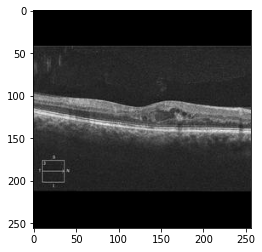

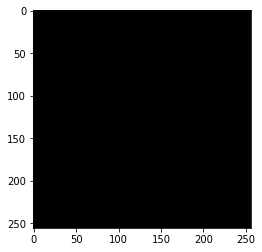

In [ ]:
inp, re = load(inputFile)
# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(inp/255.0)
plt.figure()
plt.imshow(re/255.0)

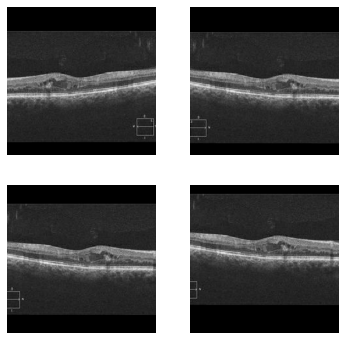

In [ ]:
plt.figure(figsize=(6, 6))
for i in range(4):
  rj_inp, rj_re = random_jitter(inp, re)
  plt.subplot(2, 2, i+1)
  plt.imshow(rj_inp/255.0)
  plt.axis('off')
plt.show()

In [ ]:
def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [ ]:
def load_image_val(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image,
                                   IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [ ]:
train_dataset = tf.data.Dataset.list_files(PATH+'training/img/*.jpg')
train_dataset = train_dataset.map(load_image_train,num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

In [ ]:
val_dataset = tf.data.Dataset.list_files(PATH+'validation/img/*.jpg')
#val_dataset = tf.data.Dataset.from_tensor_slices((image_list))
val_dataset = val_dataset.map(load_image_val)
val_dataset = val_dataset.batch(BATCH_SIZE)

In [ ]:
def generate_images( test_input, tar):
  #prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))

  display_list = [test_input[0], tar[0]]
  targeta = np.asarray(tar[0])
  #print(targeta)
  #print(np.max(targeta))
  title = ['Input Image', 'Ground Truth']

  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    if display_list[i].shape[2] < 3:
      display_list[i] = tf.broadcast_to(display_list[i], [256, 256, 3])
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()

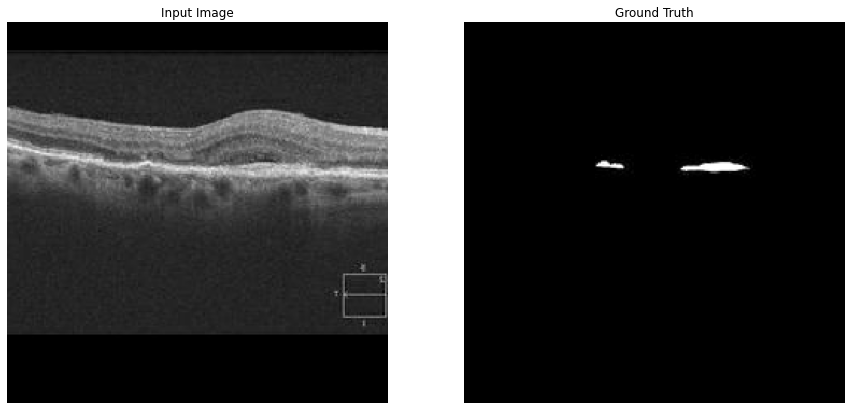

In [ ]:
for example_input, example_target in train_dataset.take(1):
  generate_images( example_input, example_target)

##Hiper parameter exploration

In [ ]:
from  datetime import datetime

In [ ]:
netDataSet = '/RESUNETPLUSPLUS/DrusenDarkOftalmo/'
log_dir = "gdrive/MyDrive/OCTProject/HPARAMS" + netDataSet  + datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
best_weigths_dir = "gdrive/MyDrive/OCTProject/WEIGTHS" + netDataSet  + datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
#log_dir = "LOGS" + netDataSet  + datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
#best_weigths_dir = "WEIGTHS" + netDataSet  + datetime.now().strftime("%Y%m%d-%H%M%S") + "/"

In [ ]:
BATCH_TEST_SIZE = 200
validation_dataset = tf.data.Dataset.list_files(PATH + '/validation/img/*.jpg')
validation_dataset = validation_dataset.map(load_image_val)
validation_dataset = validation_dataset.batch(BATCH_TEST_SIZE)
#test_dataset = test_dataset.repeat()
validation_dataset = validation_dataset.prefetch(tf.data.experimental.AUTOTUNE)

#### Look for meassueres on test dataset with own function 

In [ ]:
SMOOTH = 1e-5
def dice(im1, im2, empty_score=1.0,beta=1):
    smooth = SMOOTH
    #im1 = np.asarray(im1).astype(np.bool)
    #im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    #im_sum = im1.sum() + im2.sum()
    tp = im1 * im2
    tp = tp.sum()
    fp = im2.sum() - tp
    fn = im1.sum() - tp
    #if im_sum == 0:
     #   return empty_score

    #intersection = np.logical_and(im1, im2)
    score = (((1 + beta ** 2) * tp + smooth))/((1 + beta ** 2) * tp + beta ** 2 * fn + fp + smooth)
    #2. * intersection.sum() / im_sum
    #if score < 1 :
      #score = 2. * score
    return score

In [ ]:
def meanDicePerResults(results,Y_test):
  values = []
  #print("results shape 0 ",results.shape[0])
  for i in range(results.shape[0]):
    #print(i)
    y_scores = results[i].flatten()
    y_scores = y_scores.round()
    y_true = Y_test[i].flatten()
    y_true = y_true.round()
    dice_index = dice(y_true, y_scores)
    values.append(dice_index)
  #orderedvalues = np.argsort(values)
  return np.mean(values)

In [ ]:
def train_test_model(hparams,log_dir,best_weigths_dir):
  optimizer_name = hparams[HP_OPTIMIZER]
  learning_rate = hparams[HP_L_RATE]
  loss_function_name = hparams[HP_LOSS]
  batch_size =  hparams[HP_B_SIZE]
  
  if loss_function_name == 'bce_jaccard':
    loss_function = sm.losses.bce_jaccard_loss
  elif loss_function_name == 'bce_dice':
    loss_function = sm.losses.bce_dice_loss
  else:
    raise ValueError("unexpected loss name: %r" % (loss_function_name,))

  if optimizer_name == "adam":
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer_name == "sgd":
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    raise ValueError("unexpected optimizer name: %r" % (optimizer_name,))
  
  train_dataset = tf.data.Dataset.list_files(PATH+'training/img/*.jpg')
  train_dataset = train_dataset.map(load_image_train,num_parallel_calls=tf.data.experimental.AUTOTUNE)
  train_dataset = train_dataset.shuffle(BUFFER_SIZE)
  train_dataset = train_dataset.batch(batch_size)
  train_dataset = train_dataset.repeat()
  train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

  val_dataset = tf.data.Dataset.list_files(PATH+'validation/img/*.jpg')
  #val_dataset = tf.data.Dataset.from_tensor_slices((image_list))
  val_dataset = val_dataset.map(load_image_val)
  val_dataset = val_dataset.batch(batch_size)
  val_dataset = val_dataset.repeat()
  val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)

  if not os.path.exists(best_weigths_dir):
    os.makedirs(best_weigths_dir)

  checkpoint = tf.keras.callbacks.ModelCheckpoint(best_weigths_dir + '/bestWeigths.hdf5', monitor='val_loss',verbose=0, save_best_only=True, mode='min')

  callbacks_list = [tf.keras.callbacks.TensorBoard(log_dir=log_dir),hp.KerasCallback(log_dir, hparams),checkpoint]
  
  modelUnet = createSEUNETmodel()

  modelUnet.compile(optimizer = optimizer,
                    loss = loss_function, 
                    metrics = ['accuracy',sm.metrics.f1_score,sm.metrics.iou_score])

  modelUnet.fit(train_dataset,
                       steps_per_epoch=len(image_list)//batch_size,
                       epochs=200,
                       verbose=0, # Suppress chatty output; use Tensorboard instead
                       validation_data=val_dataset,
                       validation_steps=len(val_image_list)//batch_size,
                       callbacks=callbacks_list
                       )
  
  modelUnet.save_weights(best_weigths_dir + '/lastWeigths.hdf5')
  modelUnet.load_weights(best_weigths_dir + '/bestWeigths.hdf5')
  
  #for x_test, y_test in test_dataset.take(1):
  #  f1score= modelUnet.evaluate(x_test, y_test)
  #print(" test scores ",f1score)
  #return f1score[2]
  for x_test, y_test in validation_dataset.take(1):
    prediction = modelUnet.predict(x_test)
  y_test = np.asarray(y_test)
  x_test = np.asarray(x_test)
  prediction = np.asarray(prediction)
  f1score = meanDicePerResults(prediction,y_test)
  print(" test scores ",f1score)
  return f1score

In [ ]:
def run(run_dir, hparams,weigths_dir):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams,run_dir,weigths_dir)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
# 0.00005 0.00075
# 0.0000001 0.001
# np.log10(0.00005), np.log10(0.00075)
#np.log10(0.00035), np.log10(0.0005)
#np.log10(1e-7), np.log10(1e-2)
lrs = np.logspace(np.log10(1e-7), np.log10(1e-2), base = 10, num = 25).tolist()
#lrs = lrs[12:]
#print(lrs)
BZS = np.linspace(2, 16, num=5,dtype=np.int16).tolist()
BZS = [16]

In [ ]:
def generateLearningRatesCenter(lrs, number,secondBest):
  index = lrs.index(number)
  if index < 0:
      raise ValueError("Index to center not found")
  lrsCenter = np.logspace(np.log10(lrs[index-1]), np.log10(lrs[index+1]), base = 10, num = 5).tolist()
  lrsCenter[0] = secondBest
  lrsCenter[-1] = np.logspace(np.log10(number), np.log10(secondBest), base = 10, num = 5).tolist()[3]
  return lrsCenter

In [ ]:
lrs2 = generateLearningRatesCenter(lrs,8.25404185268019e-05,3.1622776601683795e-05)
BZS = np.linspace(2, 16, num=5,dtype=np.int16).tolist()

In [ ]:
print(lrs2)

[3.1622776601683795e-05, 6.493816315762113e-05, 8.25404185268019e-05, 0.00010491397291363102, 4.019450333615128e-05]


In [ ]:
lrs = lrs[18:25]

In [ ]:
lrs2 = lrs2[:2]

In [ ]:
print(lrs2)

[3.1622776601683795e-05, 6.493816315762113e-05]


In [ ]:
session_num = 0
#HP_L_RATE = hp.HParam('learning_rate', hp.Discrete([1e-3,1e-4,1e-5,1e-6]))
#HP_LOSS = hp.HParam('loss_function',hp.Discrete(['bce_jaccard','bce_dice']))
#HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))
METRIC_ACCURACY = 'f1-score'
HP_L_RATE = hp.HParam('learning_rate', hp.Discrete(lrs2))
HP_LOSS = hp.HParam('loss_function',hp.Discrete(['bce_dice'])) #'bce_jaccard',
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam'])) #, 'sgd'
HP_B_SIZE = hp.HParam('batch_size', hp.Discrete(BZS)) #, 'sgd'

with tf.summary.create_file_writer(log_dir).as_default():
  hp.hparams_config(
    hparams=[HP_L_RATE, HP_LOSS, HP_OPTIMIZER,HP_B_SIZE],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='valF1score')]
  )


for l_rates in HP_L_RATE.domain.values:
  for loss in HP_LOSS.domain.values:
    for optimizer in HP_OPTIMIZER.domain.values:
      for batchS in HP_B_SIZE.domain.values:
        hparams = {
            HP_L_RATE: l_rates,
            HP_LOSS : loss,
            HP_OPTIMIZER: optimizer,
            HP_B_SIZE: batchS
        }
        run_name = "run-%d" % session_num
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})
        run(log_dir + run_name, hparams,best_weigths_dir + run_name)
        session_num += 1

--- Starting trial: run-0
{'learning_rate': 3.1622776601683795e-05, 'loss_function': 'bce_dice', 'optimizer': 'adam', 'batch_size': 2}
 test scores  0.4505923718268932
--- Starting trial: run-1
{'learning_rate': 3.1622776601683795e-05, 'loss_function': 'bce_dice', 'optimizer': 'adam', 'batch_size': 5}
 test scores  0.5244301515840682
--- Starting trial: run-2
{'learning_rate': 3.1622776601683795e-05, 'loss_function': 'bce_dice', 'optimizer': 'adam', 'batch_size': 9}
 test scores  0.5628742452299805
--- Starting trial: run-3
{'learning_rate': 3.1622776601683795e-05, 'loss_function': 'bce_dice', 'optimizer': 'adam', 'batch_size': 12}
 test scores  0.519543528911417
--- Starting trial: run-4
{'learning_rate': 3.1622776601683795e-05, 'loss_function': 'bce_dice', 'optimizer': 'adam', 'batch_size': 16}
 test scores  0.47321522427314416
--- Starting trial: run-5
{'learning_rate': 6.493816315762113e-05, 'loss_function': 'bce_dice', 'optimizer': 'adam', 'batch_size': 2}
 test scores  0.45927057

In [ ]:
for x_test, y_test in test_dataset.take(1):
    prediction = modelUnet.predict(x_test)
  #for x_test, y_test in test_dataset.take(1):
  #  f1score= modelUnet.evaluate(x_test, y_test)
  #print(" test scores ",f1score)
  #return f1score[2]
y_test = np.asarray(y_test)
x_test = np.asarray(x_test)
prediction = np.asarray(prediction)
print("prediction shape ",prediction.shape,"y test shape ",y_test.shape)
f1score = meanDicePerResults(prediction,y_test)
#f1score = valDiceSEUNET
print(" test scores ",f1score)

## Tensor board looking for

## Focis Dark Images

### 20210310-050251, 20210310-155555, 20210311-170317, 20210310-192543,20210311-211531


lr 0.0001333521432163324 bz 16 -> 0.54381
<br>
lr 5.108969774506935e-05 bz 16 -> 0.53724
<br>
lr 7.498942093324558e-06 bz 16 -> 0.47116
<br>

### 20210312-005220,20210313-022146,20210313-180244,20210314-153817,20210315-000435,20210315-000435

lr 0.0001333521432163324 bz 12 -> 0.57287 20210313-022146
<br>
lr 0.00010491397291363102 bz 16 -> 0.56457 20210313-022146
<br>
lr 0.00010491397291363102 bz 16 -> 0.55109 20210313-022146
<br>

## Fluids oftalmocenter

### 20210318-021027,20210319-143937

lr 8.25404185268019e-05 bz 16 -> 0.66505 20210318-021027
<br>
lr 0.0005623413251903491 bz 16 -> 0.65155 20210318-021027
<br>
lr 0.0001333521432163324 bz 16 -> 0.64577 20210318-021027
<br>


### 20210320-005733,20210325-010239,20210320-162654

lr 0.000082540 bz 16 -> 0.65717 20210320-005733
<br>
lr 0.00056234 bz 9 -> 0.65604 20210325-010239
<br>
lr 0.00056234 bz 12 -> 0.65167 20210325-010239
<br>

## Cyst Oftalmocenter
### 20210320-194424,20210321-154238

lr 0.0005623413251903491 bz 16 -> 0.81392
<br>
lr 0.0002154434690031884 bz 16 -> 0.80871
<br>
lr 0.0003480700588428413 bz 16 -> 0.80552
<br>

### 20210321-161335,20210323-152434

lr 0.00071477 bz 2 -> 0.82693 20210323-152434
<br>
lr 0.00021544 bz 16 -> 0.81686
<br>
lr 0.00021544 bz 5 -> 0.81524
<br>


## Drusen Oftalmocenter

### 20210410-184949,20210411-054248,20210411-145538

lr 8.25404185268019e-05 bz 16 ->
0.63353 20210411-054248
<br>
lr 3.1622776601683795e-05 bz 16 -> 
0.57927 20210411-054248
<br>
lr 0.0003480700588428413 bz 16 -> 0.56883 20210411-054248
<br>

### 20210414-164048,20210414-164209 

lr 0.000064938 bz 12 -> 0.63461 20210414-164048 run 8
<br>
lr 0.00010491 bz 9 -> 0.601297 20210411-054248
<br>
lr 0.000040195 bz 2 -> 0.61748 20210414-164354
<br>


## Load tensorboard

In [ ]:
%load_ext  tensorboard

In [ ]:
print(lrs)

[1e-07, 1.615598098439873e-07, 2.6101572156825384e-07, 4.2169650342858225e-07, 6.812920690579608e-07, 1.1006941712522102e-06, 1.778279410038923e-06, 2.8729848333536687e-06, 4.641588833612782e-06, 7.498942093324558e-06, 1.2115276586285901e-05, 1.9573417814876617e-05, 3.1622776601683795e-05, 5.108969774506935e-05, 8.25404185268019e-05, 0.0001333521432163324, 0.00021544346900318845, 0.0003480700588428413, 0.0005623413251903491, 0.0009085175756516871, 0.0014677992676220704, 0.0023713737056616554, 0.003831186849557293, 0.00618965818891261, 0.01]


In [ ]:
#%tensorboard --logdir logs/fit
#%tensorboard --logdir gdrive/'My Drive'/OCTProject/HPARAMS/SEUNET/20210127-031534
%tensorboard --logdir gdrive/MyDrive/OCTProject/HPARAMS/RESUNETPLUSPLUS/DrusenDarkOftalmo/20210414-164354

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
root_path = './gdrive/My\ Drive/OCTProject/HPARAMS/SEUNET'
!cp -r {root_path} ./logs/hparam_tuning

In [ ]:
import time

In [ ]:
file_id = '10CAV9AakBK34RhAPtJSNNZSlVhvwBYS0'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [ ]:
import os

In [ ]:
img_set = os.listdir('dukeImagesFluidROIReshSplited/images/training/img')
print('training ', len(img_set))
img_set = os.listdir('dukeImagesFluidROIReshSplited/images/validation/img')
print('validation ', len(img_set))
img_set = os.listdir('dukeImagesFluidROIReshSplited/images/test/img')
print('test ', len(img_set))

training  167
validation  41
test  25


In [ ]:
modelUnet.load_weights('fs_Bseunet_pix2pixCleanedAdamepchs150.hdf5')

# Train Common way

In [ ]:
from datetime import datetime

In [ ]:
log_dir = "logs/fit/"  + datetime.now().strftime("%Y%m%d-%H%M%S")
#file_writer = tf.summary.create_file_writer(logdir + "/metrics")
#file_writer.set_as_default()

In [ ]:
OUTPUT_WEIGHTS_PATH = "fs_seunet_hiperparameterexplor_best_weigths.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(OUTPUT_WEIGHTS_PATH, monitor='val_f1-score',verbose=1, save_best_only=True, mode='max')

#csv_logger = CSVLogger('./log.out', append=True, separator=';')

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_f1-score', verbose = 1,
                              min_delta = 0.01, patience = 3, mode = 'max')
#callbacks_list = [checkpoint, csv_logger,tensorboard_callback]
callbacks_list = [tensorboard_callback,checkpoint]

In [ ]:
modelUnet = createSEUNETmodel()

In [ ]:
modelUnet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00024289),
                    loss = sm.losses.bce_dice_loss,
                  metrics = [sm.metrics.iou_score, sm.metrics.f1_score])
batch_size = 12

In [ ]:
train_dataset = tf.data.Dataset.list_files(PATH+'training/img/*.jpg')
train_dataset = train_dataset.map(load_image_train,num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

val_dataset = tf.data.Dataset.list_files(PATH+'validation/img/*.jpg')
val_dataset = tf.data.Dataset.from_tensor_slices((image_list))
val_dataset = val_dataset.map(load_image_val)
val_dataset = val_dataset.batch(batch_size)
val_dataset = val_dataset.repeat()
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
#history = modelUnet.fit(inputgenerator,
#                       steps_per_epoch=len(image_list) // batch_size,
#                       epochs=450,
#                       validation_data=validationgenerator,
#                       validation_steps=len(val_image_list)//batch_size,
#                       callbacks=callbacks_list
#                       )
history = modelUnet.fit(train_dataset,
                       steps_per_epoch=len(image_list)//batch_size,
                       epochs=200,
                       validation_data=val_dataset,
                       validation_steps=len(val_image_list)//batch_size,
                       callbacks=callbacks_list
                       )
#OUTPUT_WEIGHTS_PATH = "./" + OUTPUT_WEIGHTS_PATH
#time.sleep(120)
#!cp {OUTPUT_WEIGHTS_PATH} ./gdrive/My\ Drive/OCTProject/weigths

Train for 24 steps, validate for 2 steps
Epoch 1/200
23/24 [===========================>..] - ETA: 0s - loss: 0.5110 - iou_score: 0.3753 - f1-score: 0.4984
Epoch 00001: val_f1-score did not improve from 0.18261
24/24 [==============================] - 16s 666ms/step - loss: 0.4935 - iou_score: 0.3951 - f1-score: 0.5160 - val_loss: 0.8505 - val_iou_score: 0.0844 - val_f1-score: 0.1542
Epoch 2/200
23/24 [===========================>..] - ETA: 0s - loss: 0.5409 - iou_score: 0.3563 - f1-score: 0.4692
Epoch 00002: val_f1-score did not improve from 0.18261
24/24 [==============================] - 15s 624ms/step - loss: 0.5352 - iou_score: 0.3587 - f1-score: 0.4740 - val_loss: 0.8327 - val_iou_score: 0.0950 - val_f1-score: 0.1720
Epoch 3/200
23/24 [===========================>..] - ETA: 0s - loss: 0.5020 - iou_score: 0.3927 - f1-score: 0.5070
Epoch 00003: val_f1-score did not improve from 0.18261
24/24 [==============================] - 15s 616ms/step - loss: 0.5022 - iou_score: 0.3897 - f1-s

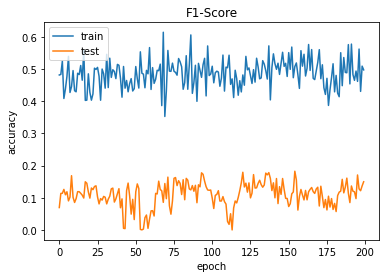

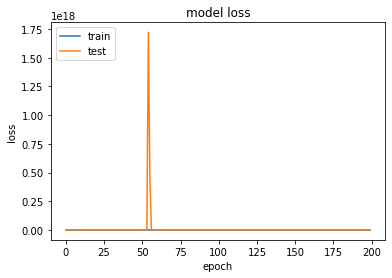

In [ ]:
plt.plot(history.history['f1-score'])
plt.plot(history.history['val_f1-score'])
plt.title('F1-Score')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plt.plot(history.history['jacard_coef'])
#plt.plot(history.history['val_jacard_coef'])
#plt.title('model jacard')
#plt.ylabel('Jacard')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

#plt.plot(history.history['dice_coef'])
#plt.plot(history.history['val_dice_coef'])
#plt.title('model Dice')
#plt.ylabel('Dice')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

In [ ]:
modelUnet = createSEUNETmodel()

In [ ]:
#modelUnet.save_weights('fs_RESunet_hiperparameterExploration_normal400epcs.hdf5')

In [ ]:
BATCH_TEST_SIZE = 100
test_dataset = tf.data.Dataset.list_files(PATH + 'test/img/*.jpg')
test_dataset = test_dataset.map(load_image_val)
test_dataset = test_dataset.batch(BATCH_TEST_SIZE)
#test_dataset = test_dataset.repeat()
#test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
BATCH_TEST_SIZE = 120
test_dataset = tf.data.Dataset.list_files(PATH + 'validation/img/*.jpg')
test_dataset = test_dataset.map(load_image_val)
test_dataset = test_dataset.batch(BATCH_TEST_SIZE)

In [ ]:
!rm -rf SEUNETImagesPrediction

In [ ]:
for x_test, y_test in test_dataset.take(1):
    f1score= modelUnet.evaluate(x_test, y_test)
print(" test scores ",f1score," F1 SCORE ",f1score[2])

72/72 [==============================] - 1s 7ms/sample - loss: 0.0999 - iou_score: 0.8319 - f1-score: 0.9079
 test scores  [0.09992078443368275, 0.83190346, 0.90787125]  F1 SCORE  0.90787125


## Evaluate just with tensorflow generator

In [1]:
#pathw = './gdrive/MyDrive/OCTProject/WEIGTHS/RESUNETPLUSPLUS/FocisDarkOftalmo/20210313-022146/run-8/'
pathw = './gdrive/MyDrive/OCTProject/WEIGTHS/RESUNETPLUSPLUS/CystDarkOftalmo/20210323-152434/run-15/'
pathw = './gdrive/MyDrive/OCTProject/WEIGTHS/RESUNETPLUSPLUS/FluidsDarkOftalmo/20210318-021027/run-4/'
pathw = './gdrive/MyDrive/OCTProject/WEIGTHS/RESUNETPLUSPLUS/DrusenDarkOftalmo/20210414-164048/run-8/'

In [ ]:
modelUnet.load_weights(pathw+'bestWeigths.hdf5')

In [ ]:
BATCH_TEST_SIZE = 200
test_dataset = tf.data.Dataset.list_files(PATH + 'test/img/*.jpg')
test_dataset = test_dataset.map(load_image_val)
test_dataset = test_dataset.batch(BATCH_TEST_SIZE)
#test_dataset = test_dataset.repeat()
#test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
for x_test, y_test in test_dataset.take(1):
    prediction= modelUnet.predict(x_test)

In [ ]:
print(prediction.shape)

(146, 256, 256, 1)


In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [ ]:
SMOOTH = 1e-5
def dice(im1, im2, empty_score=1.0,beta=1):
    smooth = SMOOTH
    #im1 = np.asarray(im1).astype(np.bool)
    #im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    #im_sum = im1.sum() + im2.sum()
    tp = im1 * im2
    tp = tp.sum()
    fp = im2.sum() - tp
    fn = im1.sum() - tp
    #if im_sum == 0:
     #   return empty_score

    #intersection = np.logical_and(im1, im2)
    score = (((1 + beta ** 2) * tp + smooth))/((1 + beta ** 2) * tp + beta ** 2 * fn + fp + smooth)
    #2. * intersection.sum() / im_sum
    #if score < 1 :
      #score = 2. * score
    return score

In [ ]:
def jaccard(x,y):
  x = np.asarray(x, np.bool) # Not necessary, if you keep your data
  y = np.asarray(y, np.bool) # in a boolean array already!
  return np.double(np.bitwise_and(x, y).sum()) / np.double(np.bitwise_or(x, y).sum()) 

In [ ]:
def meanJaccardPerResults(results):
  less_value = 1
  better_result = 0
  worst_case = 0
  mean_confussion = np.zeros((2,2))
  values = []
  for i in range(results.shape[0]):
    y_scores = results[i].flatten()
    y_scores = y_scores.round()
    y_true = y_test[i].flatten()
    y_true = y_true.round()
    confusion = confusion_matrix(y_true.round(), y_scores.round())
    if confusion.shape[0] == 1:
      new = np.zeros((2,2))
      new[0][0]=confusion[0][0]
      confusion = new
    mean_confussion = mean_confussion + confusion
    jaccard_index = jaccard_score(y_true, y_scores)
    #jaccard_index = jaccard(y_true, y_scores)
    #print(jaccard_index)
    #if jaccard_index > 0:
    values.append(jaccard_index)
  mean_confussion = mean_confussion/results.shape[0]
  orderedvalues = np.argsort(values)
  print(orderedvalues)
  return mean_confussion,orderedvalues,values

In [ ]:
def meanDicePerResults(results,Y_test):
  values = []
  for i in range(results.shape[0]):
    y_scores = results[i].flatten()
    y_scores = y_scores.round()
    y_true = Y_test[i].flatten()
    y_true = y_true.round()
    dice_index = dice(y_true, y_scores)
    values.append(dice_index)
  orderedvalues = np.argsort(values)
  return orderedvalues,values

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

In [ ]:
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
def matrix(mean_confussion):
  binary = mean_confussion.astype(int)
  print(binary)
  fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True)
#plt.show()

In [ ]:
y_test = np.asarray(y_test)
x_test = np.asarray(x_test)
prediction = np.asarray(prediction)

In [ ]:
confussionSEUNET,ovSEUNET,vSEUNET = meanJaccardPerResults(prediction)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[  0  75  74  73 144 122  70  69 124  67  64  63 126  61  60  59  58  57
  56  55 108 128  76  77  78  79 107 112 103 102 101 100  99 113  96 114
  52 116  90  89  88  87  86  84  83  82 120  80  91 129 127  22  26  25
  24  23  20  19  18  17 138 139  13  11 141 142 143   5   4   3   2  27
  28 109 137  41  29  40  39  38  45 134  47  48 136  33  32 131 135  97
  66 106 119   8 133  44 130  50  35  37 110   1  12  94  31  92  10  21
  15  65 145 123  85   9 121  72 117  53  95 115 105   7  36  51  43 118
 111 140  71 104  68  16  54  81  93  62  98 132  49  14  42  46  34   6
  30 125]


[[65337    54]
 [   82    61]]


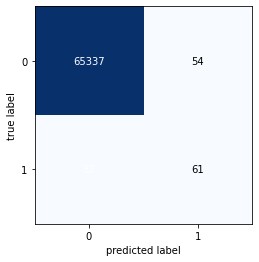

In [ ]:
matrix(confussionSEUNET)

In [ ]:
orderValDiceSEUNET,valDiceSEUNET = meanDicePerResults(prediction,y_test)

In [ ]:
print("mean jaccard SE unet",np.mean(vSEUNET))
print("mean dice SE unet",np.mean(valDiceSEUNET))
#UMN ENTIRE
#0.9060 fs_Bseunet_hiperparameterExploration_normal200epcs2.hdf5
#0.9157 fs_Bseunet_hiperparameterExploration_normal200epcs2.hdf5
#0.9141 fs_seunet_hiperparameterexplor_best_weigths.hdf5

mean jaccard SE unet 0.13872403183058687
mean dice SE unet 0.6037154048688049


In [ ]:
def get_one_image(imageNumber,jaccardValue,results):
  fig = plt.figure(figsize=(9, 4))
  ax = fig.add_subplot(1, 3, 1)
  Y_toPlot = results[imageNumber]
  img2 = np.zeros((Y_toPlot.shape[0],Y_toPlot.shape[1])+(3,))
  data = np.rollaxis(Y_toPlot, -1, 0)
  img2[:,:,0] = data[0]
  img2[:,:,1] = data[0]
  img2[:,:,2] = data[0]
  ax.imshow(img2, cmap=plt.cm.Greys_r)
  ax.set_title('Dice val ' + str(round(jaccardValue,2)))
  ax = fig.add_subplot(1, 3, 2)
  Y_toPlot = y_test[imageNumber]
  img2 = np.zeros((Y_toPlot.shape[0],Y_toPlot.shape[1])+(3,))
  data = np.rollaxis(Y_toPlot, -1, 0)
  img2[:,:,0] = data[0]
  img2[:,:,1] = data[0]
  img2[:,:,2] = data[0]
  ax.imshow(img2, cmap=plt.cm.Greys_r)
  ax.set_title('Correct')
  ax = fig.add_subplot(1, 3, 3)
  ax.imshow(x_test[i])
  ax.set_title('Image')
  plt.show()

In [ ]:
for i in orderValDiceSEUNET:
  get_one_image(i,valDiceSEUNET[i],prediction)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from PIL import Image
import os

In [ ]:
mainPathSavePr = './RESUNETImagesPrediction/'
realImgs = mainPathSavePr + 'realImg/'
predictionImgs = mainPathSavePr + 'predictionsImg/'
maskFluid = mainPathSavePr +'maskFluid1/'

In [ ]:
def save_one_image(imageNumber,jaccardValue,results):
  if not os.path.exists(realImgs):
    os.makedirs(realImgs)
  if not os.path.exists(predictionImgs):
    os.makedirs(predictionImgs)
  if not os.path.exists(maskFluid):
    os.makedirs(maskFluid)

  Y_toPlot = np.round(results[imageNumber])
  img2 = np.zeros((Y_toPlot.shape[0],Y_toPlot.shape[1])+(3,))
  data = np.rollaxis(Y_toPlot, -1, 0)
  img2[:,:,0] = data[0]
  img2[:,:,1] = data[0]
  img2[:,:,2] = data[0]
  #print(img2)
  img = tf.keras.preprocessing.image.array_to_img(img2)
  tf.keras.preprocessing.image.save_img(predictionImgs +str(imageNumber)+ '.jpg',img)
  #im.save(predictionImgs +imageNumber+ '.jpg')

  Y_toPlot = y_test[imageNumber]
  img2 = np.zeros((Y_toPlot.shape[0],Y_toPlot.shape[1])+(3,))
  data = np.rollaxis(Y_toPlot, -1, 0)
  img2[:,:,0] = data[0]
  img2[:,:,1] = data[0]
  img2[:,:,2] = data[0]
  img = tf.keras.preprocessing.image.array_to_img(img2)
  tf.keras.preprocessing.image.save_img(maskFluid +str(imageNumber)+ '.jpg',img)

  img = tf.keras.preprocessing.image.array_to_img(x_test[i])
  tf.keras.preprocessing.image.save_img(realImgs +str(imageNumber)+ '.jpg',img)
  #im = Image.fromarray(x_test[i])
  #im.save(realImgs +imageNumber+ '.jpg')


In [ ]:
for i in orderValDiceSEUNET:
  save_one_image(i,valDiceSEUNET[i],prediction)

In [ ]:
PATH_TO_SAVE = './gdrive/MyDrive/OCTProject/AfterParameterExploration/RESUNETPLUSPLUS/FocisDarkImgs/'

In [ ]:
!mkdir -p {PATH_TO_SAVE + 'weigths'}

In [ ]:
!cp ./fs_seunet_hiperparameterexplor_best_weigths400epchs.hdf5 {PATH_TO_SAVE + 'weigths' }
!cp ./fs_RESunet_hiperparameterExploration_normal400epcs.hdf5 {PATH_TO_SAVE + 'weigths' }
!cp ./fs_RESunet_hiperparameterExploration_normal200epcs.hdf5 {PATH_TO_SAVE + 'weigths' }
#!cp ./fs_seunet_hiperparameterexplor_best_weigths.hdf5 {PATH_TO_SAVE + 'weigths' }

In [ ]:
!cp -r  ./SEUNETImagesPrediction {PATH_TO_SAVE}

In [ ]:
!cp ./fs_Bseunet_256TF2Adame150CleanDukeFocos.hdf5 ./gdrive/My\ Drive/OCTProject/weigths/weigthsSIPAIM

In [ ]:
OUTPUT_WEIGHTS_PATH = "./fs_Bseunet_pix2pixCleanedAdamepchs150.hdf5"
!cp {OUTPUT_WEIGHTS_PATH} {root_path}

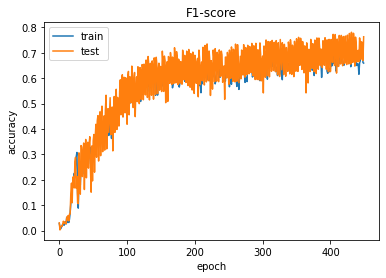

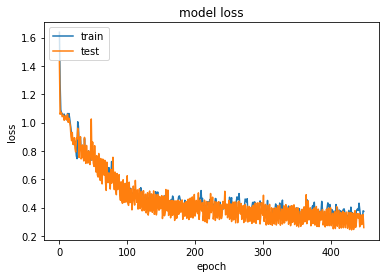

In [ ]:
plt.plot(history.history['f1-score'])
plt.plot(history.history['val_f1-score'])
plt.title('F1-score')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plt.plot(history.history['jacard_coef'])
#plt.plot(history.history['val_jacard_coef'])
#plt.title('model jacard')
#plt.ylabel('Jacard')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

#plt.plot(history.history['dice_coef'])
#plt.plot(history.history['val_dice_coef'])
#plt.title('model Dice')
#plt.ylabel('Dice')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

In [ ]:
validationgenerator=generate_generator_multiple(validation_datagen,
                                          dir1=validation_data_dir,
                                          dir2=validation_mask_data_dir,
                                          batch_size=300,
                                          img_height=256,
                                          img_width=256) 

In [ ]:
testgenerator=generate_generator_multiple(test_datagen,
                                          dir1=test_data_dir,
                                          dir2=test_mask_data_dir,
                                          batch_size=300,
                                          img_height=256,
                                          img_width=256)

In [ ]:
X_test, Y_test = next(validationgenerator)

Found 42 images belonging to 1 classes.
Found 42 images belonging to 1 classes.


In [ ]:
print(X_test.shape,Y_test.shape)

(42, 256, 256, 3) (42, 256, 256, 1)


In [ ]:
modelUnet.load_weights('fs_Bseunet_256TF2Adame150CleanDukeFocos.hdf5')

In [ ]:
file_id = '1-1r46SDfF0KJijQ-cEGeSUf-IwMbe3tN'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])
modelUnet.load_weights('fs_Bseunet_256TF2Adame150NoCleanDukeFluid.hdf5')

In [ ]:
file_id = '1-FL_RMzdP0lAjaIJCQbIJuF9tzhQQJ2R'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])
modelUnet.load_weights('fs_Bseunet_256TF2Adame150NoCleanDukeFocos.hdf5')

In [ ]:
results = modelUnet.predict(X_test)

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def jaccard(x,y):
  x = np.asarray(x, np.bool) # Not necessary, if you keep your data
  y = np.asarray(y, np.bool) # in a boolean array already!
  return np.double(np.bitwise_and(x, y).sum()) / np.double(np.bitwise_or(x, y).sum())

In [ ]:
def meanJaccardPerResults(results,Y_test):
  less_value = 1
  better_result = 0
  worst_case = 0
  mean_confussion = np.zeros((2,2))
  values = []
  for i in range(results.shape[0]):
    y_scores = results[i].flatten()
    y_scores = y_scores.round()
    y_true = Y_test[i].flatten()
    y_true = y_true.round()
    confusion = confusion_matrix(y_true.round(), y_scores.round())
    if confusion.shape[0] == 1:
      new = np.zeros((2,2))
      new[0][0]=confusion[0][0]
      confusion = new
    mean_confussion = mean_confussion + confusion
    jaccard_index = jaccard_score(y_true, y_scores)
    #jaccard_index = jaccard(y_true, y_scores)
    #print(jaccard_index)
    #if jaccard_index > 0:
    values.append(jaccard_index)
  mean_confussion = mean_confussion/results.shape[0]
  orderedvalues = np.argsort(values)
  print(orderedvalues)
  return mean_confussion,orderedvalues,values

In [ ]:
SMOOTH = 1e-5
def dice(im1, im2, empty_score=1.0,beta=1):
    smooth = SMOOTH
    #im1 = np.asarray(im1).astype(np.bool)
    #im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    #im_sum = im1.sum() + im2.sum()
    tp = im1 * im2
    tp = tp.sum()
    fp = im2.sum() - tp
    fn = im1.sum() - tp
    #if im_sum == 0:
     #   return empty_score

    #intersection = np.logical_and(im1, im2)
    score = (((1 + beta ** 2) * tp + smooth))/((1 + beta ** 2) * tp + beta ** 2 * fn + fp + smooth)
    #2. * intersection.sum() / im_sum
    #if score < 1 :
      #score = 2. * score
    return score

In [ ]:
def meanDicePerResults(results,Y_test):
  values = []
  for i in range(results.shape[0]):
    y_scores = results[i].flatten()
    y_scores = y_scores.round()
    y_true = Y_test[i].flatten()
    y_true = y_true.round()
    dice_index = dice(y_true, y_scores)
    values.append(dice_index)
  orderedvalues = np.argsort(values)
  return orderedvalues,values

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

In [ ]:
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
def matrix(mean_confussion):
  binary = mean_confussion.astype(int)
  print(binary)
  fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True)
#plt.show()

In [ ]:
confussionSEUNET,ovSEUnet,vSEUNet = meanJaccardPerResults(results,Y_test)

[24 31 17  7 15 18 28 29  6 27  2  5 40  1  0  4  8 13 23 14 26 33  3 19
 10 41 36 16 25 30 20 12 38 22 32 37 35 11  9 21 39 34]


[[65310    54]
 [   30   139]]


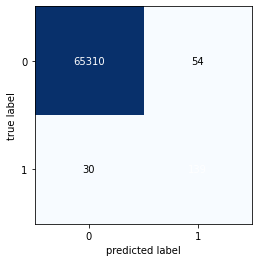

In [ ]:
matrix(confussionSEUNET)

In [ ]:
orderValDiceSEUnet,valDiceSEUnet = meanDicePerResults(results,Y_test)

In [ ]:
print("mean jaccard SE unet",np.mean(vSEUNet))
print("mean dice SE unet",np.mean(valDiceSEUnet))

mean jaccard SE unet 0.537208692209817
mean dice SE unet 0.6835659275992415


In [ ]:
print(orderValDiceSEUnet)

[24 31 17  7 15 18 28 29  6  2 27  5 40  1  0  4  8 13 23 14 26 33  3 19
 10 41 36 16 25 30 20 12 38 22 32 37 35 11  9 21 39 34]


In [ ]:
def get_one_image(imageNumber,jaccardValue,results):
  fig = plt.figure(figsize=(9, 4))
  ax = fig.add_subplot(1, 3, 1)
  Y_toPlot = results[imageNumber]
  img2 = np.zeros((Y_toPlot.shape[0],Y_toPlot.shape[1])+(3,))
  data = np.rollaxis(Y_toPlot, -1, 0)
  img2[:,:,0] = data[0]
  img2[:,:,1] = data[0]
  img2[:,:,2] = data[0]
  ax.imshow(img2, cmap=plt.cm.Greys_r)
  ax.set_title('Dice val ' + str(round(jaccardValue,2)))
  ax = fig.add_subplot(1, 3, 2)
  Y_toPlot = Y_test[imageNumber]
  img2 = np.zeros((Y_toPlot.shape[0],Y_toPlot.shape[1])+(3,))
  data = np.rollaxis(Y_toPlot, -1, 0)
  img2[:,:,0] = data[0]
  img2[:,:,1] = data[0]
  img2[:,:,2] = data[0]
  ax.imshow(img2, cmap=plt.cm.Greys_r)
  ax.set_title('Correct')
  ax = fig.add_subplot(1, 3, 3)
  X_toPlot = X_test[i]
  img2 = np.zeros((X_toPlot.shape[0],X_toPlot.shape[1])+(3,))
  data = np.rollaxis(X_toPlot, -1, 0)
  img2[:,:,0] = data[0]
  img2[:,:,1] = data[0]
  img2[:,:,2] = data[0]
  ax.imshow(img2)
  ax.set_title('Image')
  plt.show()

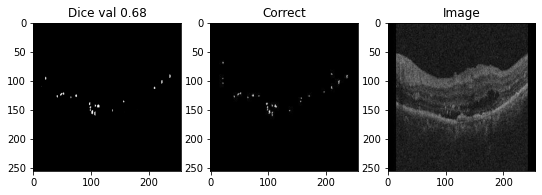

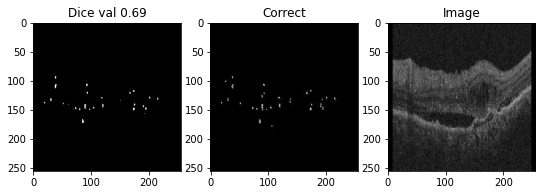

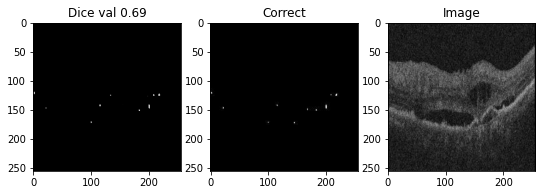

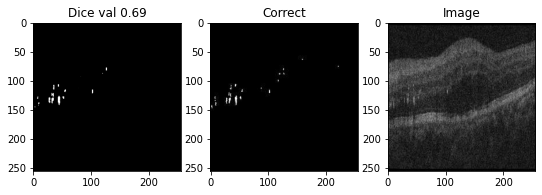

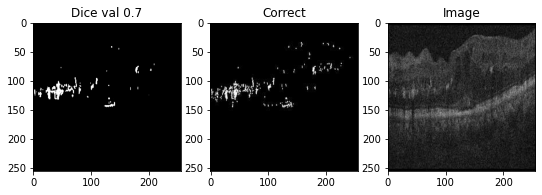

In [ ]:
BestFiveCases = orderValDiceSEUnet[-28:-23]
for i in BestFiveCases:
  get_one_image(i,valDiceSEUnet[i],results)

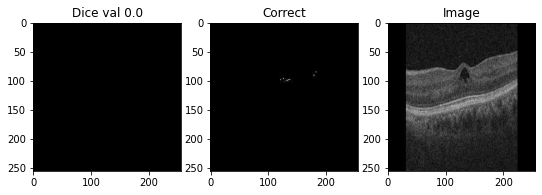

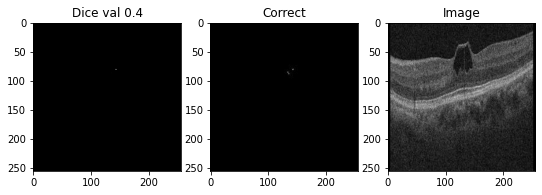

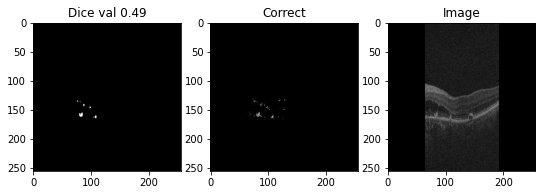

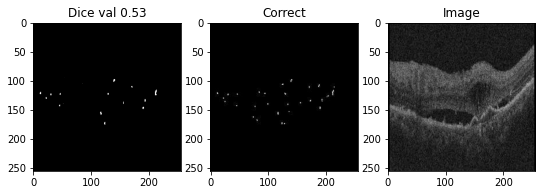

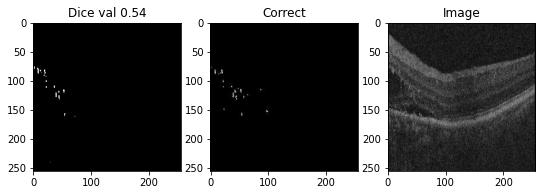

In [ ]:
WortsFiveCases = orderValDiceSEUnet[:5]
for i in WortsFiveCases:
  get_one_image(i,valDiceSEUnet[i],results)

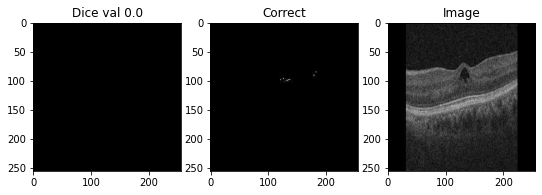

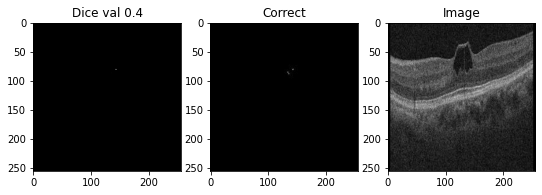

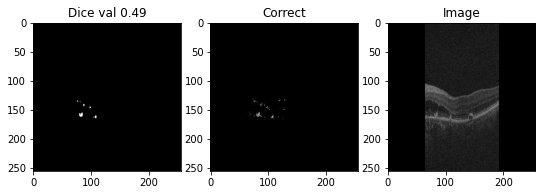

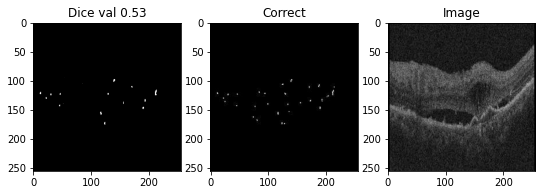

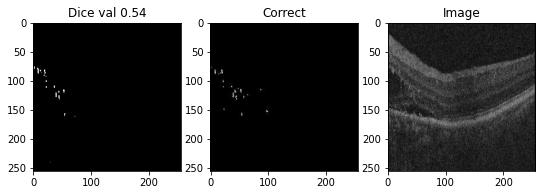

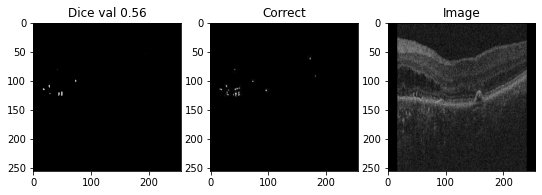

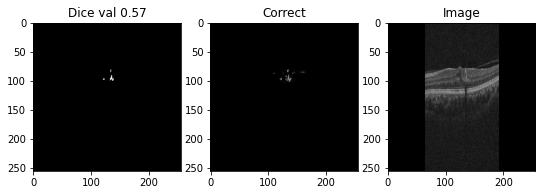

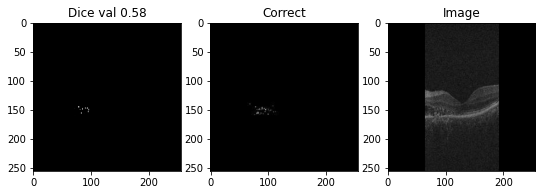

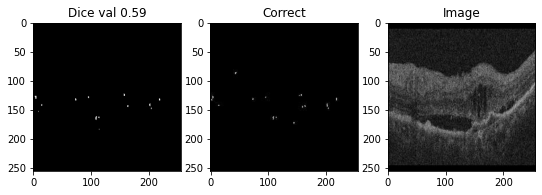

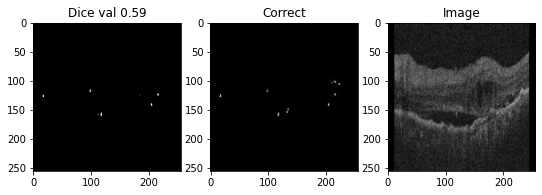

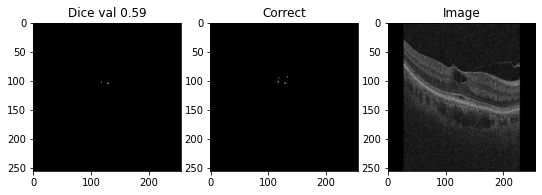

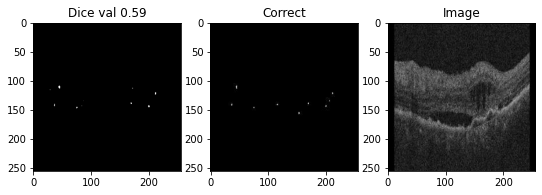

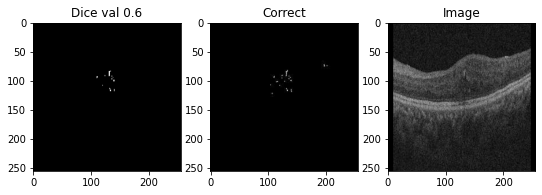

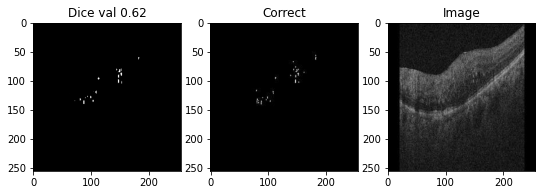

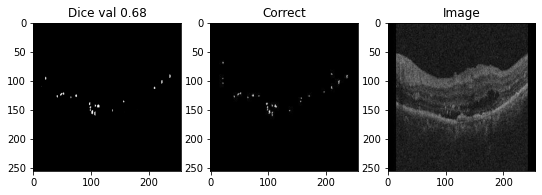

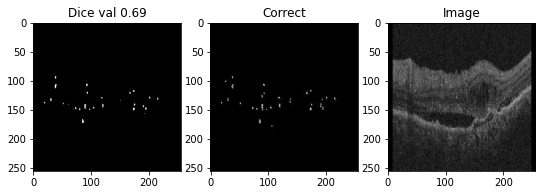

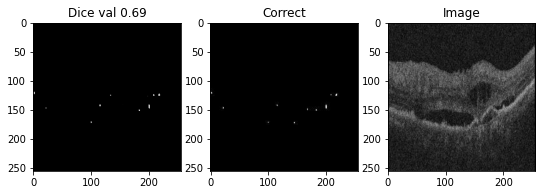

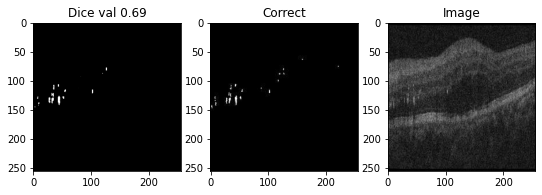

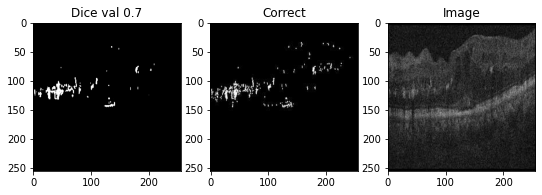

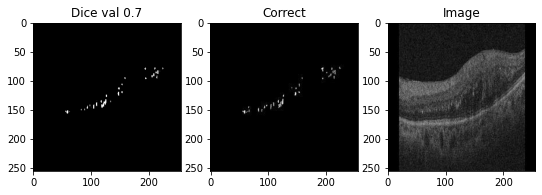

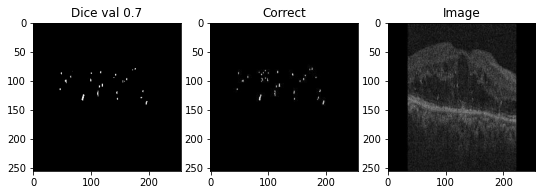

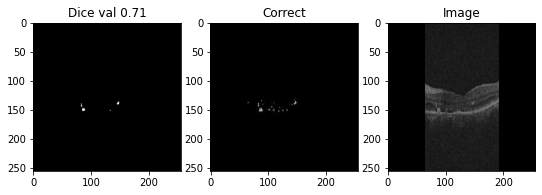

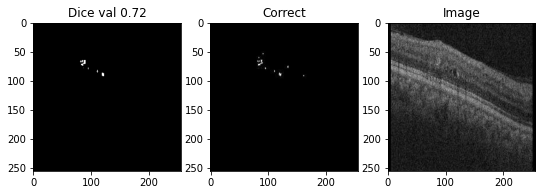

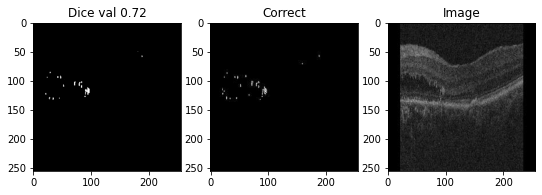

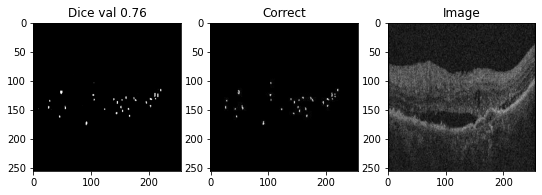

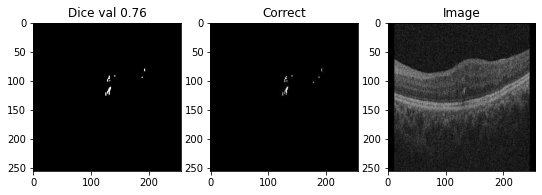

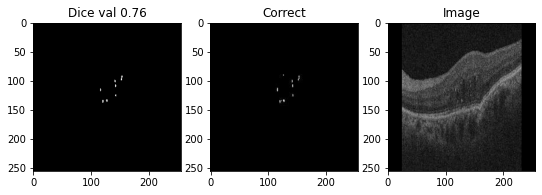

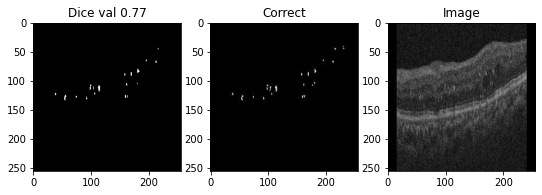

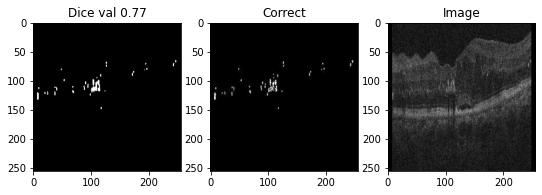

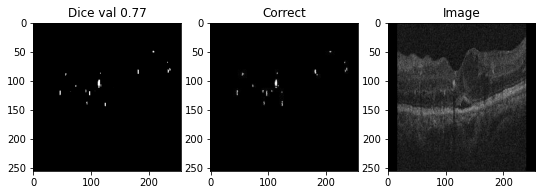

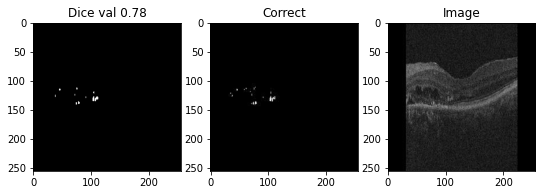

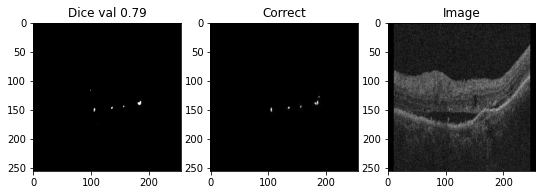

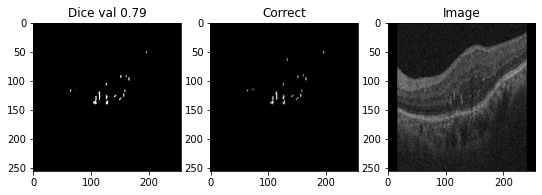

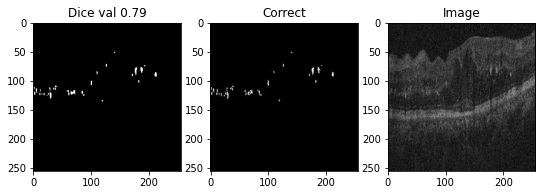

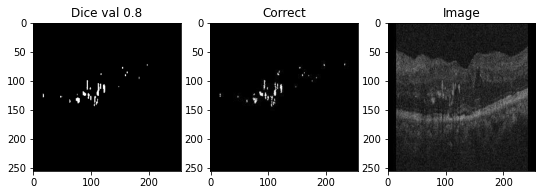

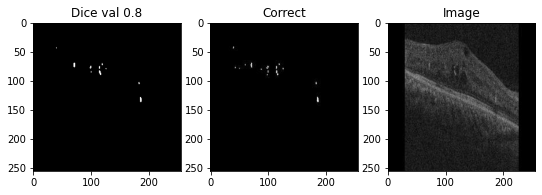

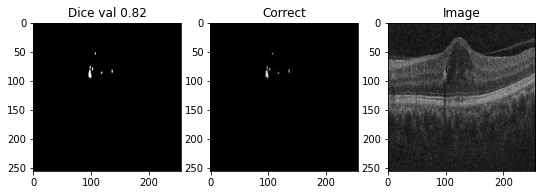

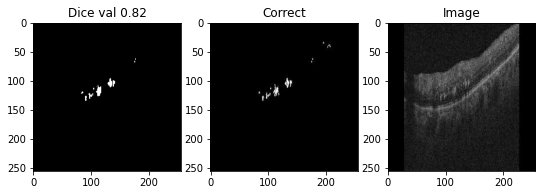

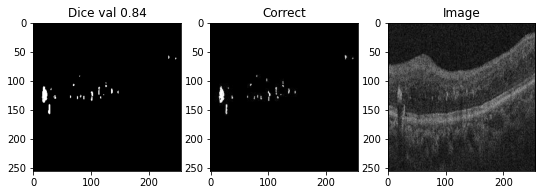

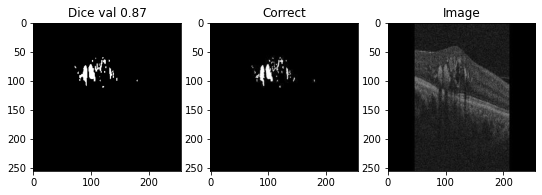

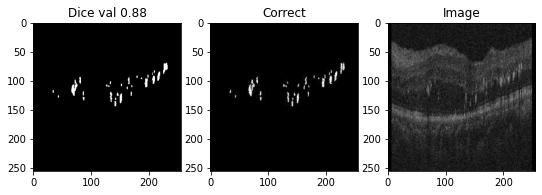

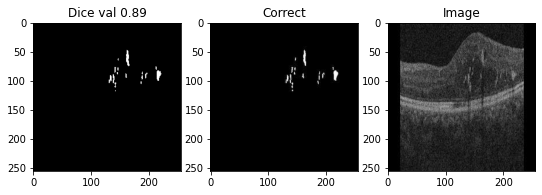

In [ ]:
for i in orderValDiceSEUnet:
  get_one_image(i,valDiceSEUnet[i],results)

In [ ]:
validationgenerator=generate_generator_multiple(validation_datagen,
                                          dir1=validation_data_dir,
                                          dir2=validation_mask_data_dir,
                                          batch_size=108,
                                          img_height=256,
                                          img_width=256)

In [ ]:
X_val, Y_val = next(validationgenerator)
print(X_val.shape,Y_val.shape)

Found 108 images belonging to 1 classes.
Found 108 images belonging to 1 classes.
(108, 256, 256, 3) (108, 256, 256, 1)


In [ ]:
resultsVal_SEunet = modelunet.predict(X_val)

In [ ]:
orderValDicevalSEUnet,valDicevalSEUnet = meanDicePerResults(resultsVal_SEunet,Y_val)

In [ ]:
print("mean validation dice se unet",np.mean(valDicevalSEUnet))

mean validation dice se unet 0.6111111111111112


In [ ]:
def get_one_image(imageNumber,jaccardValue,results):
  fig = plt.figure(figsize=(9, 4))
  ax = fig.add_subplot(1, 3, 1)
  Y_toPlot = results[imageNumber]
  img2 = np.zeros((Y_toPlot.shape[0],Y_toPlot.shape[1])+(3,))
  data = np.rollaxis(Y_toPlot, -1, 0)
  img2[:,:,0] = data[0]
  img2[:,:,1] = data[0]
  img2[:,:,2] = data[0]
  ax.imshow(img2, cmap=plt.cm.Greys_r)
  ax.set_title('Dice val ' + str(round(jaccardValue,2)))
  ax = fig.add_subplot(1, 3, 2)
  Y_toPlot = Y_val[imageNumber]
  img2 = np.zeros((Y_toPlot.shape[0],Y_toPlot.shape[1])+(3,))
  data = np.rollaxis(Y_toPlot, -1, 0)
  img2[:,:,0] = data[0]
  img2[:,:,1] = data[0]
  img2[:,:,2] = data[0]
  ax.imshow(img2, cmap=plt.cm.Greys_r)
  ax.set_title('Correct')
  ax = fig.add_subplot(1, 3, 3)
  ax.imshow(X_test[i])
  ax.set_title('Image')
  plt.show()

In [ ]:
for i in orderValDicevalSEUnet:
  get_one_image(i,valDicevalSEUnet[i],resultsVal_SEunet)

NameError: ignored